<a href="https://colab.research.google.com/github/nanobites000/model-training/blob/main/OverUnderSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, naive_bayes, ensemble, tree, svm, model_selection, preprocessing, feature_extraction, metrics, base, pipeline
from joblib import dump, load
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import PIL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Import for Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

Import for Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
steam_df = pd.read_csv('/content/drive/MyDrive/Teaching Materials/ML/Datasets/Steam Reviews Constructiveness Annotations/steam_reviews_constructiveness_1.5k.csv')

In [ ]:
display(steam_df)

,id,game,review,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive
0,1,Among Us,This game can suck my balls before I play it a...,6,False,1,0,0
1,2,Among Us,Very fun little party game! Even better with f...,11,True,0,0,1
2,3,Among Us,if you're lonely don't bother but if you're no...,40,True,2,1,0
3,4,Among Us,fun and anoyying,80,True,0,0,0
4,5,Among Us,when impostor is sus...,51,True,0,0,0
...,...,...,...,...,...,...,...,...
1456,1457,Tom Clancy's Rainbow Six Siege,Good. Been better in the past.,857,True,0,0,0
1457,1458,Tom Clancy's Rainbow Six Siege,Great game but man the community is full of 12...,2,True,0,0,0
1458,1459,Tom Clancy's Rainbow Six Siege,I like smashing skulls in with a sledge hammer,71,True,0,0,0
1459,1460,Tom Clancy's Rainbow Six Siege,why do i die,78,True,0,0,0


In [ ]:
print(steam_df.isnull().sum())

id                           0
game                         0
review                       0
author_playtime_at_review    0
voted_up                     0
votes_up                     0
votes_funny                  0
constructive                 0
dtype: int64


In [ ]:
steam_df = steam_df.dropna()

In [ ]:
steam_df['voted_up'] = steam_df['voted_up'].map({True: 1, False: 0})

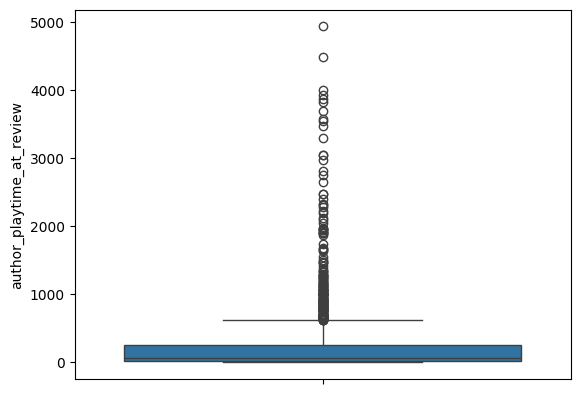

In [ ]:
sns.boxplot(steam_df['author_playtime_at_review'])
plt.show()

In [ ]:
steam_df = steam_df[steam_df['author_playtime_at_review'] < steam_df['author_playtime_at_review'].quantile(0.95)]

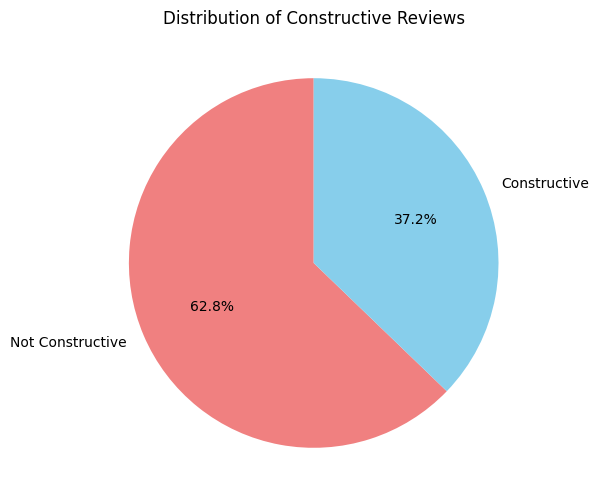

In [ ]:
# Get the value counts for the 'constructive' column
constructive_counts = steam_df['constructive'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(constructive_counts, labels=['Not Constructive', 'Constructive'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title('Distribution of Constructive Reviews')
plt.show()

In [ ]:
steam_df = pd.get_dummies(steam_df, columns=['game'], drop_first=True)

In [ ]:
scaler = StandardScaler()
steam_df[['author_playtime_at_review', 'votes_up', 'votes_funny']] = scaler.fit_transform(steam_df[['author_playtime_at_review', 'votes_up', 'votes_funny']])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_text = vectorizer.fit_transform(steam_df['review'])

df_text = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())
steam_df = pd.concat([steam_df.reset_index(drop=True), df_text.reset_index(drop=True)], axis=1)

steam_df.drop('review', axis=1, inplace=True)
steam_df

,id,author_playtime_at_review,voted_up,votes_up,votes_funny,constructive,game_Counter-Strike 2,game_ELDEN RING,game_Garry's Mod,game_Grand Theft Auto V,...,worse,worst,worth,wouldn,wrong,xbox,yeah,year,years,yes
0,1,-0.678010,0,0.068866,-0.106797,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,2,-0.656779,1,-0.160191,-0.106797,1,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,3,-0.533639,1,0.297923,0.290328,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,4,-0.363792,1,-0.160191,-0.106797,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,5,-0.486931,1,-0.160191,-0.106797,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,1457,2.935497,1,-0.160191,-0.106797,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1383,1458,-0.694994,1,-0.160191,-0.106797,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306226,0.0,0.0
1384,1459,-0.402007,1,-0.160191,-0.106797,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1385,1460,-0.372284,1,-0.160191,-0.106797,0,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
X = steam_df.drop('constructive', axis=1)
y = steam_df['constructive']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[193  69]
 [111  44]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       262
           1       0.39      0.28      0.33       155

    accuracy                           0.57       417
   macro avg       0.51      0.51      0.51       417
weighted avg       0.54      0.57      0.55       417



**Oversampling**

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152 110]
 [ 81  74]]
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       262
           1       0.40      0.48      0.44       155

    accuracy                           0.54       417
   macro avg       0.53      0.53      0.53       417
weighted avg       0.56      0.54      0.55       417



**Undersampling**

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[146 116]
 [ 87  68]]
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       262
           1       0.37      0.44      0.40       155

    accuracy                           0.51       417
   macro avg       0.50      0.50      0.50       417
weighted avg       0.53      0.51      0.52       417



**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[235  27]
 [ 77  78]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       262
           1       0.74      0.50      0.60       155

    accuracy                           0.75       417
   macro avg       0.75      0.70      0.71       417
weighted avg       0.75      0.75      0.74       417



Oversampling

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[228  34]
 [ 73  82]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       262
           1       0.71      0.53      0.61       155

    accuracy                           0.74       417
   macro avg       0.73      0.70      0.71       417
weighted avg       0.74      0.74      0.73       417



Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[213  49]
 [ 59  96]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       262
           1       0.66      0.62      0.64       155

    accuracy                           0.74       417
   macro avg       0.72      0.72      0.72       417
weighted avg       0.74      0.74      0.74       417



**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[232  30]
 [ 78  77]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       262
           1       0.72      0.50      0.59       155

    accuracy                           0.74       417
   macro avg       0.73      0.69      0.70       417
weighted avg       0.74      0.74      0.73       417



Oversampling

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_resampled, y_resampled)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[210  52]
 [ 49 106]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       262
           1       0.67      0.68      0.68       155

    accuracy                           0.76       417
   macro avg       0.74      0.74      0.74       417
weighted avg       0.76      0.76      0.76       417



Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_resampled, y_resampled)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[193  69]
 [ 47 108]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       262
           1       0.61      0.70      0.65       155

    accuracy                           0.72       417
   macro avg       0.71      0.72      0.71       417
weighted avg       0.73      0.72      0.72       417

